In [1]:
import sys
sys.path.append("..")
path= "../"

import argparse
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns
import copy
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import h5py
from collections import Counter
import pickle
import os
plt.ion()
plt.show()
%load_ext autoreload
%autoreload 2
plt.style.use(f'article.mplstyle')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df_real = pd.read_pickle(f"{path}output/real.pkl")

In [3]:
df_balanced = pd.read_pickle(f"{path}output/balanced.pkl")

In [4]:
df_imbalanced = pd.read_pickle(f"{path}output/imbalanced.pkl")

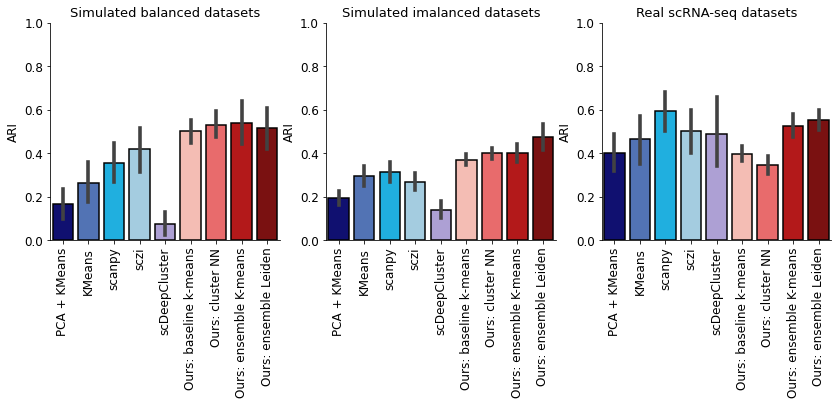

In [5]:
clrs = [
    'navy', '#416ec5', 'deepskyblue', '#9acfea', "#a897dd", '#feb6aa',
    '#fd5658', '#cc0001', "darkred"
]
plt.figure(figsize=(14, 4))
plt.subplot(131)
sns.barplot(
    x="variable",
    y="value",
    data=df_balanced,
    palette=clrs,
    edgecolor='black',
    linewidth=1.5,
)
plt.title("Simulated balanced datasets")
plt.ylim((0, 1))
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("ARI")
sns.despine()

plt.subplot(132)
sns.barplot(
    x="variable",
    y="value",
    data=df_imbalanced,
    palette=clrs,
    edgecolor='black',
    linewidth=1.5,
)
plt.title("Simulated imalanced datasets")
plt.ylim((0, 1))
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("ARI")
sns.despine()

plt.subplot(133)
sns.barplot(
    x="variable",
    y="value",
    data=df_real,
    palette=clrs,
    edgecolor='black',
    linewidth=1.5,
)
plt.title("Real scRNA-seq datasets")
plt.ylim((0, 1))
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("ARI")
sns.despine()
plt.savefig(f"{path}diagrams/methods_comparaison.pdf", bbox_inches='tight')

# Common plot Dropout impact vs nb of predictors in ensemble

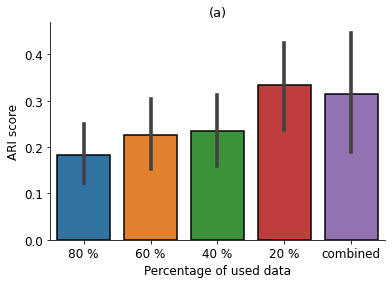

In [6]:
category = "imbalanced_data"
dropout = pd.read_pickle(f"{path}output/pickle_results/{category}/real_data_augmentation.pkl")

def get_label(x):
    if x == -1: 
        return "combined"
    if x == 100:
        return "80 %"
    if x == 200:
        return "60 %"
    if x == 300:
        return "40 %"
    if x == 400:
        return "20 %"

dropout["label"] = dropout["nd"].apply(get_label)

plt.title("(a)")
sns.barplot(
    x="label",
    y="ari",
    data=dropout,
    edgecolor='black',
    linewidth=1.5,
)
plt.xlabel("Percentage of used data")
plt.ylabel("ARI score")
sns.despine()
# plt.savefig(f"{path}diagrams/dropoutopout.pdf", bbox_inches='tight')

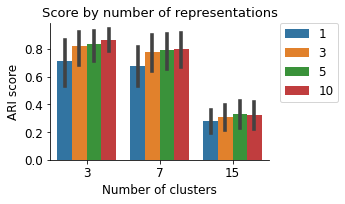

In [8]:
category = "balanced"

all_df = None
for run in range(3):
    for name in [f"{path}output/pickle_results/{category}_{run}.pkl"]:
        df = pd.read_pickle(name)
        df["run"] = run
        if all_df is None:
            all_df = df
        else:
            all_df = pd.concat([all_df, df], ignore_index=True)
            
columns = [

    'nclust',
    'dropout',
    'self0_initial_3_500',
    'combined_features10_500',
    'combined_features3_500',
    'combined_features5_500',
]

nb_pred_map = {
        'self0_initial_3_500':1,
    'combined_features10_500':10,
    'combined_features3_500':3,
    'combined_features5_500':5,
}

df1 = all_df[columns]

df1 =pd.melt(df1, id_vars=[ 'dropout',  'nclust'])
df1[ 'nclust']=df1[ 'nclust'].astype(int)
df1["n_predictors"]=df1["variable"].apply(lambda x: nb_pred_map[x])

plt.figure(figsize = (5, 3))
ax = plt.gca()
sns.barplot(
    data=df1, 
    x="nclust", y="value", hue="n_predictors",
    ax = ax
)
plt.xlabel("Number of clusters")
plt.ylabel("ARI score")
plt.title("Score by number of representations")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine();
plt.tight_layout()


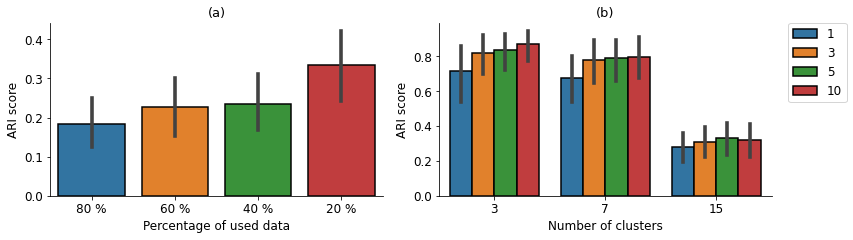

In [9]:
plt.figure(figsize=(12, 3.5))
plt.subplot(121)

plt.title("(a)")
sns.barplot(
    x="label",
    y="ari",
    data=dropout[dropout["label"]!= "combined"],
    edgecolor='black',
    linewidth=1.5,
)
plt.xlabel("Percentage of used data")
plt.ylabel("ARI score")
sns.despine()

plt.subplot(122)
plt.title("(b)")
sns.barplot(
    data=df1,
    x="nclust",
    y="value",
    hue="n_predictors",
    edgecolor='black',
    linewidth=1.5,
)
plt.xlabel("Number of clusters")
plt.ylabel("ARI score")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.tight_layout()
plt.savefig(f"{path}diagrams/dropout_and_nb_repr.pdf", bbox_inches='tight')